In [ ]:
from classification import DecisionTree
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('../cancer_data.csv')
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


<Axes: xlabel='vital_status', ylabel='Count'>

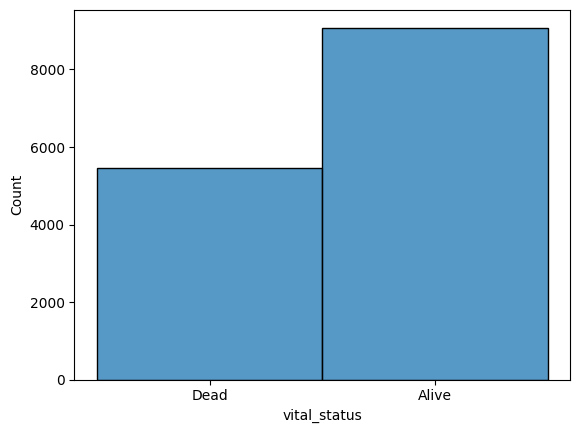

In [34]:
sns.histplot(df, x='vital_status')

In [35]:
df['vital_status'].value_counts()

vital_status
Alive    9081
Dead     5471
Name: count, dtype: int64

In [36]:
# Define a function to map values
def map_values(value):
    if value == 'Alive':
        return 1
    elif value == 'Dead':
        return 0
    else:
        return -1

# Apply the function to the column
df['mapped_labels'] = df['vital_status'].apply(map_values)
print(df['mapped_labels'].value_counts())

# Specify the column name for the labels
label_column = 'mapped_labels'

# Split the DataFrame into features (X) and labels (y)
X = df.drop(columns=['vital_status', 'mapped_labels'])  # All columns except the label column
y = list(df[label_column]) # Only the label column
print(X.info())
unique_values = list(set(y))
print("Labels:", unique_values)

# Split data into train (70%) and temporary test (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation (50% of temporary) and test (50% of temporary)
# Equivalent to 15% test and %15 validation from the original split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Convert X splits into lists
X_train = X_train.values.tolist()  # Features for training set as a list of lists
X_val = X_val.values.tolist()      # Features for validation set as a list of lists
X_test = X_test.values.tolist()    # Features for test set as a list of lists

classifier = DecisionTree()
classifier.fit(X_train, y_train)

train_y_hat = classifier.predict(X_train)
validation_y_hat = classifier.predict(X_val)
test_y_hat = classifier.predict(X_test)

# Function to calculate performance metrics
def calculate_performance(validation_y, validation_y_hat):
    # Ensure inputs are lists
    validation_y = list(validation_y)
    validation_y_hat = list(validation_y_hat)
    
    # Initialize counters
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0

    # Count TP, FP, TN, FN including -1 cases (for multiclass classification)
    for actual, predicted in zip(validation_y, validation_y_hat):
        if actual == 1 and predicted == 1:
            true_positive += 1
        elif actual == 0 and predicted == 1:
            false_positive += 1
        elif actual == 1 and predicted == 0:
            false_negative += 1
        elif actual == 0 and predicted == 0:
            true_negative += 1
        elif actual == -1:
            if predicted == -1:
                true_negative += 1
            else:
                false_positive += 1
        elif predicted == -1:
            false_negative += 1

    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(validation_y)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

print("\nClassification Report (Train):")
calculate_performance(y_train, train_y_hat)

print("\nClassification Report (Validation):")
calculate_performance(y_val, validation_y_hat)

print("\nClassification Report (Test):")
calculate_performance(y_test, test_y_hat)

# Generate classification report
report = classification_report(y_val, validation_y_hat)
print(report)


mapped_labels
1    9081
0    5471
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   treatment_type               14552 non-null  object
dtypes: int64(1), object(8)
memory usage: 1023.3+ KB
None
Labels: [0, 1]
Training set size: 10186
Validation set size: 2183
Test set size: 2183

Classification Report (Train):
Accuracy: 1.00
Precision: 1.0

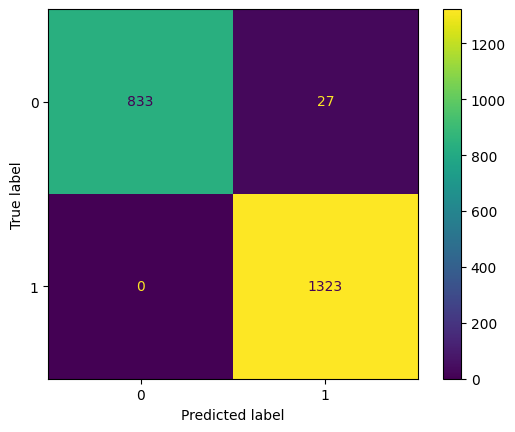

In [37]:
# Generate and display confusion matrix
cm = confusion_matrix(y_val, validation_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

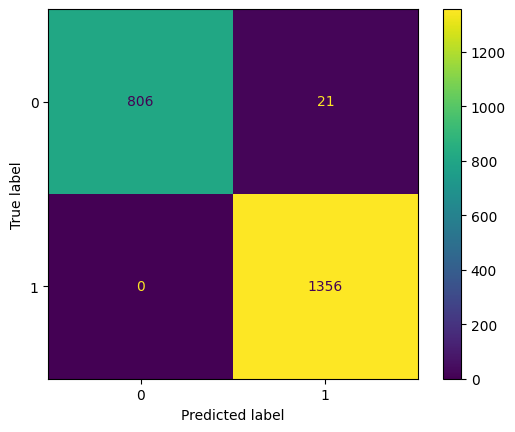

In [38]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, test_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()